In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris, load_wine
import pandas as pd
from sklearn.decomposition import NMF, non_negative_factorization
from scipy.io import loadmat

In [2]:
from ukmeans import UKMeans

# Simple example

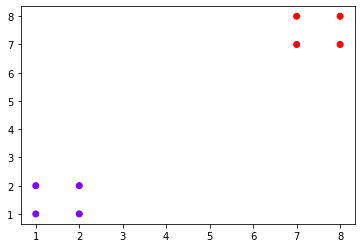

In [3]:
X = np.array(
    [
        [1, 1],
        [1, 2],
        [2, 1],
        [2, 2],

        [7, 7],
        [7, 8],
        [8, 7],
        [8, 8],
    ]
)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [4]:
y[np.argmin(np.linalg.norm(X-np.array([[1.5,1.5]]), axis=1))]

0

In [5]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 4.23 ms, sys: 17 µs, total: 4.25 ms
Wall time: 2.98 ms


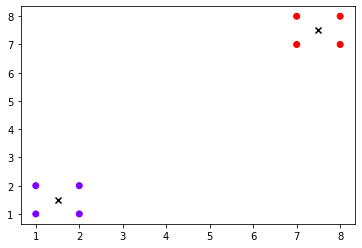

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

In [7]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 1, number of clusters: 2, AR: 1.0


# Example 1

In [8]:
rng = np.random.default_rng(seed=1)

mu = {
    1: np.array([5, 2]),
    2: np.array([3, 4]),
    3: np.array([8, 4]),
    4: np.array([6, 6]),
    5: np.array([10, 8]),
    6: np.array([7, 10]),
}

sigma = np.array([
    [0.4, 0],
    [0, 0.4],
])

X = np.zeros((400, 2))
y = np.zeros(400)
for i in range(400):
    c = rng.integers(1, 7)
    X[i] = rng.multivariate_normal(mu[c], sigma)
    y[i] = c-1


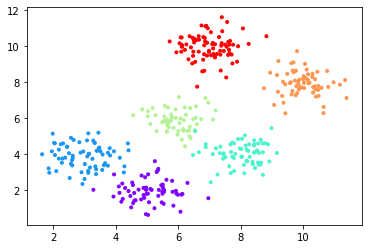

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')


In [10]:
%%time
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

CPU times: user 2.51 s, sys: 46 ms, total: 2.56 s
Wall time: 2.49 s


In [11]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 13, number of clusters: 6, AR: 0.99


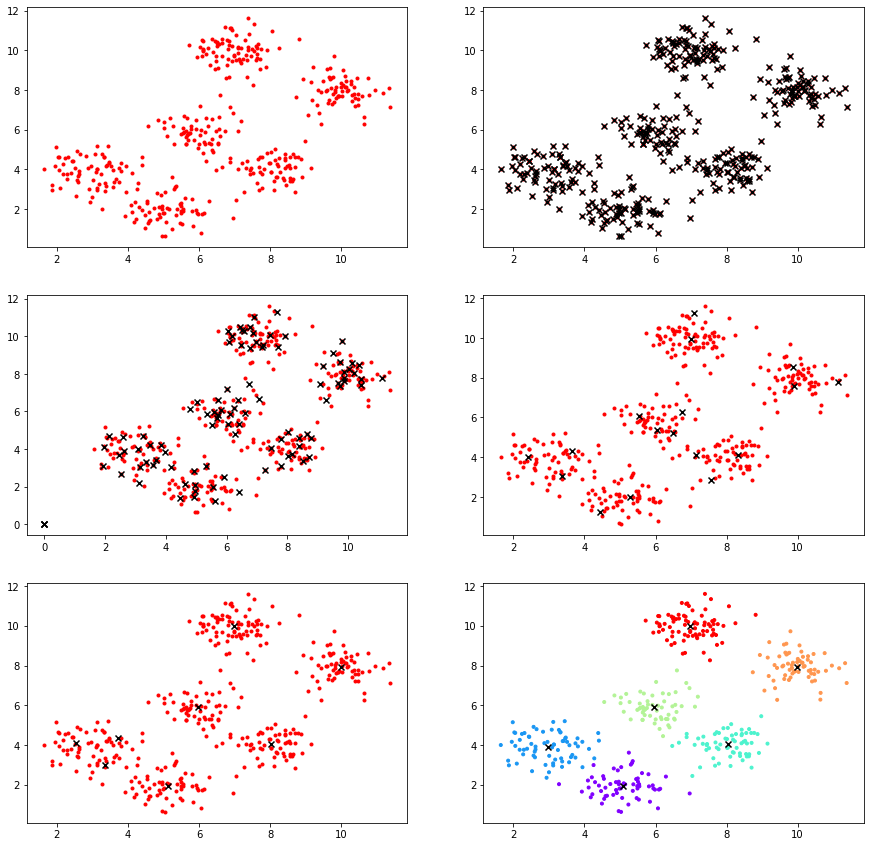

In [12]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[0]['centroids'][:,0], clf.record[0]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[1]['centroids'][:,0], clf.record[1]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 4)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[3]['centroids'][:,0], clf.record[3]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[8]['centroids'][:,0], clf.record[8]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

## With noisy dataset

In [13]:
rng = np.random.default_rng(seed=1)
for i in range(50):
    noise = rng.uniform(-2,2,(1,2))
    c = rng.integers(1, 7)

    X = np.concatenate((X, noise+mu[c]))
    y = np.concatenate((y, [c-1]))


In [14]:
%%time
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

CPU times: user 3.44 s, sys: 239 ms, total: 3.68 s
Wall time: 3.45 s


In [15]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 6, AR: 0.9688888888888889


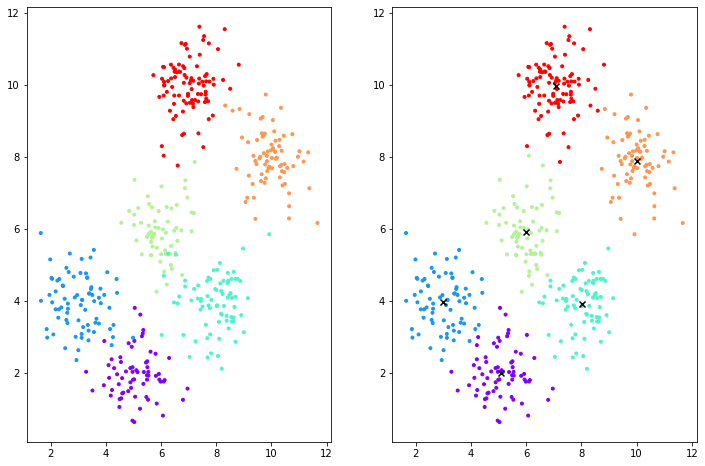

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

# Example 2

In [17]:
# rng = np.random.default_rng(seed=1)

# mu = {
#     1: np.array([16, 15, 13]),
#     2: np.array([16, 10, 13]),
    
#     3: np.array([10, 20, 10]),
#     4: np.array([10, 15, 9]),
#     5: np.array([10, 10, 9]),

#     6: np.array([6, 20, 6]),
#     7: np.array([6, 15, 5]),
#     8: np.array([6, 10, 5]),
#     9: np.array([8, 5, 5]),
#     10: np.array([8, 0, 5]),

#     11: np.array([3, 20, 2]),
#     12: np.array([3, 15, 2]),
#     13: np.array([0, 15, 4]),
#     14: np.array([0, 10, 4]),
# }

# sigma = np.eye(3)

# X = np.zeros((800, 3))
# y = np.zeros(800)
# for i in range(800):
#     c = rng.integers(1, 15)
#     X[i] = rng.multivariate_normal(mu[c], sigma)
#     y[i] = c

X, y = make_blobs(n_samples=800, center_box=(-2,20), centers=14, cluster_std=0.70, n_features=3, random_state=0)


In [18]:
%%time
clf = UKMeans(epsilon=1e-9)
clf.fit(X)


CPU times: user 9.07 s, sys: 12.3 ms, total: 9.08 s
Wall time: 9.07 s


In [19]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 14, AR: 0.99625


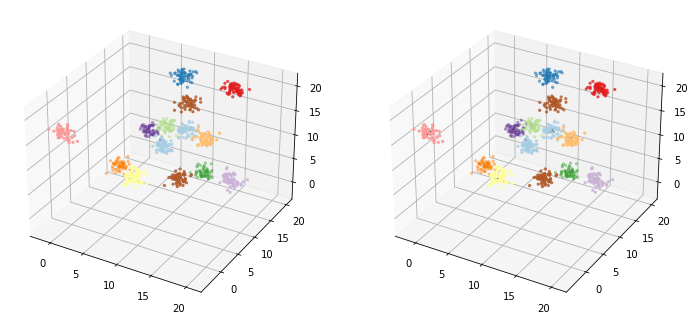

In [20]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='.', cmap='Paired')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clf.predict(X), marker='.', cmap='Paired')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], clf.centroids[:, 2], c='black', marker='x')


# Example 3

## paper

In [21]:
rng = np.random.default_rng(seed=1)

alpha = [0.2, 0.3, 0.1, 0.1, 0.2, 0.1]

mu = {
    1: np.array([2, 4, 6, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 5, 0, 0, 1]),
    2: np.array([0, 1, 3, 5, 0.1, 0.1, 0.5, 0.5, 0, 0, 2, 4, 3, 1, 1, 1, 0.25, 0.5, 0.7, 2.5]),
    3: np.array([5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 1, 1, 1, 1]),
    4: np.array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7]),
    5: np.array([1.25, 1.3, 1.45, 1.5, 2.25, 2.3, 2.45, 2.5, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2]),
    6: np.array([0, 0, 1, 1, 0.5, 0.5, 2.5, 2.5, 5, 5, 1, 1, 5, 5, 0, 0, 0.75, 1.5, 3.5, 5.5]),
}

cov = np.eye(20)

centers = list(mu.values())
X, y = make_blobs(n_samples=900, centers=centers, cluster_std=0.8, n_features=20, random_state=0)

In [22]:
%%time
clf = UKMeans(epsilon=1e-4)
clf.fit(X)

CPU times: user 10.3 s, sys: 23.9 ms, total: 10.3 s
Wall time: 10.3 s


In [23]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 11, number of clusters: 6, AR: 1.0


# Example 4

In [24]:
def is_inside_square(p, cneter, side):
    return np.all(p >= cneter-side/2) and np.all(p <= cneter+side/2)


def generate_square(samples, centers, sides, angle):
    r = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
    X = np.zeros((samples, centers.shape[1]))
    y = np.zeros(samples)
    for i in range(samples):
        c = rng.integers(9)
        cov = np.eye(2)*sides[c]
        p = rng.multivariate_normal(np.array([0,0]), cov)
        while not is_inside_square(p, np.array([0,0]), sides[c]):
            p = rng.multivariate_normal(np.array([0,0]), cov)
        X[i] = r@p
        X[i] += centers[c]
        y[i] = c
    return X, y


In [25]:
centers = np.array([
    [-1, 0],
    [1, 0],
    [3, 0],

    [-1, 2],
    [1, 2],
    [3, 2],

    [-1, 4],
    [1, 4],
    [3, 4],
])
X, y = generate_square(3000, centers=centers, sides=[1.5]*9, angle=np.pi/4)


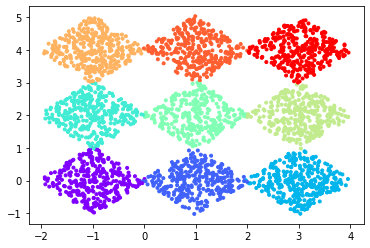

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')

In [27]:
%%time
clf = UKMeans(epsilon=1e-4)
clf.fit(X)

CPU times: user 1min 14s, sys: 42.3 ms, total: 1min 14s
Wall time: 1min 14s


In [28]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 11, number of clusters: 9, AR: 0.996


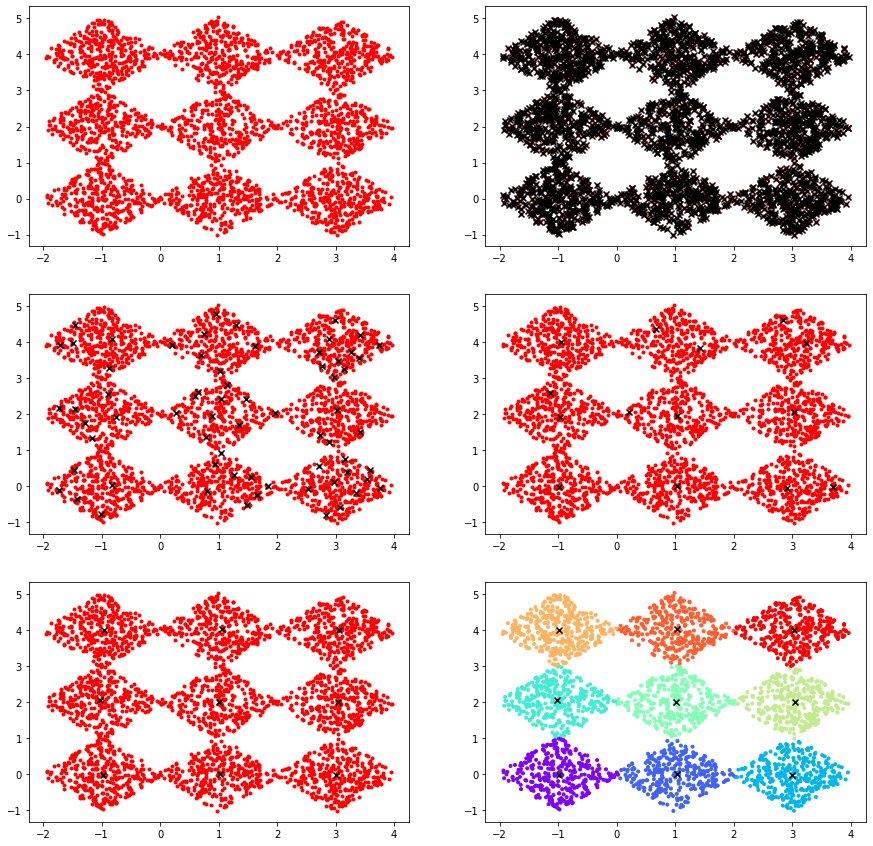

In [29]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[0]['centroids'][:,0], clf.record[0]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[2]['centroids'][:,0], clf.record[2]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 4)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[4]['centroids'][:,0], clf.record[4]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[6]['centroids'][:,0], clf.record[6]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

# Example 5
## IRIS

In [30]:
X, y = load_iris(return_X_y=True)
# X = NMF(init='', max_iter=10000, shuffle=False).fit_transform(X)


In [31]:
%%time
clf = UKMeans(epsilon=1e-1)
clf.fit(X)

CPU times: user 253 ms, sys: 4.04 ms, total: 257 ms
Wall time: 251 ms


In [32]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 6, number of clusters: 3, AR: 0.8866666666666667


## seeds

In [33]:
seeds_df = pd.read_csv("datasets/seeds_dataset.txt", header=None, delimiter="\t")
X,y = seeds_df.iloc[:,:-1].to_numpy(), seeds_df.iloc[:,-1].to_numpy()
y = y-1
# X = NMF(init=None, max_iter=10000, shuffle=False).fit_transform(X)


In [34]:
%%time
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

CPU times: user 683 ms, sys: 157 ms, total: 839 ms
Wall time: 682 ms


In [35]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 16, number of clusters: 3, AR: 0.8857142857142857


## austrailian

*Failed*

In [36]:
aus_df = pd.read_csv('datasets/australian.dat', header=None, delimiter=" ")
X, y = aus_df.iloc[:,:-1].to_numpy(), aus_df.iloc[:,-1].to_numpy()
X = NMF(init=None, max_iter=100000, shuffle=True, random_state=None).fit_transform(X)


In [37]:
%%time
clf = UKMeans(epsilon=1e-1)
clf.fit(X)

CPU times: user 7.49 s, sys: 64.5 ms, total: 7.55 s
Wall time: 6.31 s


/home/ms/Study ShirazUni/StatisticalPatternRecognition/FinalProject/ukmeans.py:53: RuntimeWarning: invalid value encountered in double_scalars
  second_term = (1-np.max(np.sum(self.z, axis=0) /


In [38]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 15, number of clusters: 1, AR: 0


## Flowmeter D

*Unable to perform non-negetave matrix factorization*

In [39]:
flowmeter_df = pd.read_csv('datasets/Meter D', header=None, delimiter="\t")
X, y = flowmeter_df.iloc[:,:-1].to_numpy(), flowmeter_df.iloc[:,-1].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=True).fit_transform(X)


In [40]:
%%time
clf = UKMeans(epsilon=1e-4)
clf.fit(X)


CPU times: user 935 ms, sys: 52.4 ms, total: 987 ms
Wall time: 923 ms


In [41]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 25, number of clusters: 2, AR: 0


## Wine

In [42]:
# wine_df = pd.read_csv('datasets/wine.data', header=None, delimiter=",")
wine_df = load_wine(as_frame=True).frame
X, y = wine_df.iloc[:,:-1].to_numpy(), wine_df.iloc[:,-1].to_numpy()
X = NMF(init='nndsvd', max_iter=10000, shuffle=True).fit_transform(X)


In [43]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 1.8 s, sys: 88.5 ms, total: 1.89 s
Wall time: 557 ms


In [44]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 26, number of clusters: 3, AR: 0.6067415730337079


## Horse

the paper does not mention how it handles the missing values 

In [45]:
horse_df = pd.read_csv('datasets/horse-colic.data', header=None, delimiter=" ")
# horse_df.replace('?', np.nan, inplace=True)
# horse_df.dropna(axis=1,inplace=True)
# horse_df.describe()
# X, y = horse_df.iloc[:,:-1].to_numpy(), horse_df.iloc[:,-1].to_numpy()
# clf = UKMeans(epsilon=1e0)
# clf.fit(X)


## Waveform V1

In [46]:
wave_df = pd.read_csv('datasets/waveform.data', header=None, delimiter=",")
X, y = wave_df.iloc[:,:-1].to_numpy(), wave_df.iloc[:,-1].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)


In [47]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 4min, sys: 82.2 ms, total: 4min
Wall time: 4min


In [48]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 71, number of clusters: 4, AR: 0


# Example 6

## SPECT

In [49]:
spect_df = pd.read_csv('datasets/SPECT.test', header=None, delimiter=',')
X, y = spect_df.iloc[:,1:].to_numpy(), spect_df.iloc[:,0].to_numpy()
X = NMF(init='random', max_iter=10000, shuffle=True, random_state=0).fit_transform(X)


In [50]:
%%time
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

CPU times: user 1.66 s, sys: 80.2 ms, total: 1.74 s
Wall time: 440 ms


In [51]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 5, number of clusters: 2, AR: 0.4385026737967914


## Parkinson

In [52]:
parkinson_df = pd.read_csv('datasets/parkinsons.data', header=0, delimiter=",")
parkinson_df.drop(parkinson_df.columns[0], axis=1, inplace=True)
X, y = parkinson_df.drop('status',axis=1).to_numpy(), parkinson_df.loc[:,'status'].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)


In [53]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 1.12 s, sys: 72.3 ms, total: 1.19 s
Wall time: 1.08 s


In [54]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 28, number of clusters: 2, AR: 0.6974358974358974


## WPBC

In [55]:
wpbc_df = pd.read_csv('datasets/wpbc.csv', header=0, delimiter=",")
wpbc_df.drop(wpbc_df.columns[0], axis=1, inplace=True)
wpbc_df.drop(wpbc_df.columns[-1], axis=1, inplace=True)
wpbc_df.replace('M', 0, inplace=True)
wpbc_df.replace('B', 1, inplace=True)
X, y = wpbc_df.iloc[:,1:].to_numpy(), wpbc_df.iloc[:, 0].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)


In [56]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 6 s, sys: 84.3 ms, total: 6.09 s
Wall time: 5.99 s


In [57]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 52, number of clusters: 2, AR: 0.8541300527240774


## Colon

dataset with the specified samples (62) and features (2000) was not found in UCI repository

## Lung

dataset with the specified samples (203) and features (3312) was not found in UCI repository

## Nci9

dataset with the specified samples (60) and features (9712) was not found in UCI repository

# Example 7

## Yale faces

*failed*

In [58]:
rng = np.random.default_rng()
images = loadmat('datasets/Yale_32x32.mat')
X = np.concatenate((
    images['fea'][images['gnd'].ravel() == 1, :][:9],
    images['fea'][images['gnd'].ravel() == 2, :][:9],
    images['fea'][images['gnd'].ravel() == 3, :][:9],
    images['fea'][images['gnd'].ravel() == 4, :][:9],
    images['fea'][images['gnd'].ravel() == 5, :][:9],
    images['fea'][images['gnd'].ravel() == 6, :][:9],
    images['fea'][images['gnd'].ravel() == 7, :][:9],
    images['fea'][images['gnd'].ravel() == 8, :][:9],
    images['fea'][images['gnd'].ravel() == 9, :][:9],
    images['fea'][images['gnd'].ravel() == 10, :][:9],
    images['fea'][images['gnd'].ravel() == 11, :][:9],
    images['fea'][images['gnd'].ravel() == 12, :][:9],
    images['fea'][images['gnd'].ravel() == 13, :][:9],
    images['fea'][images['gnd'].ravel() == 14, :][:9],
    images['fea'][images['gnd'].ravel() == 15, :][:9],
))
y = np.concatenate((
    np.zeros(9),
    np.ones(9),
    np.ones(9)*2,
    np.ones(9)*3,
    np.ones(9)*4,
    np.ones(9)*5,
    np.ones(9)*6,
    np.ones(9)*7,
    np.ones(9)*8,
    np.ones(9)*9,
    np.ones(9)*10,
    np.ones(9)*11,
    np.ones(9)*12,
    np.ones(9)*13,
    np.ones(9)*14,
))


# p = PCA(n_components=13)
# X = p.fit_transform(X)

In [59]:
%%time
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

CPU times: user 346 ms, sys: 4 ms, total: 350 ms
Wall time: 349 ms


/home/ms/Study ShirazUni/StatisticalPatternRecognition/FinalProject/ukmeans.py:48: RuntimeWarning: overflow encountered in double_scalars
  eta = min(1, 1/self.t**(np.floor(X.shape[1]/2 - 1)))


In [60]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 2, AR: 0


# Example 8

## CIFAR-10

In [61]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [62]:
cifar_df = unpickle(
    'datasets/cifar-10-python/cifar-10-batches-py/data_batch_2')

# discard first hunderd rows
data, labels = cifar_df[b'data'][1:], np.array(cifar_df[b'labels'][1:])
X = np.concatenate((
    data[labels == 0, :][:10],
    data[labels == 1, :][:10],
    data[labels == 2, :][:10],
    data[labels == 3, :][:10],
    data[labels == 4, :][:10],
    data[labels == 5, :][:10],
    data[labels == 6, :][:10],
    data[labels == 7, :][:10],
    data[labels == 8, :][:10],
    data[labels == 9, :][:10],
))

y = np.concatenate((
    np.zeros(10),
    np.ones(10),
    np.ones(10) * 2,
    np.ones(10) * 3,
    np.ones(10) * 4,
    np.ones(10) * 5,
    np.ones(10) * 6,
    np.ones(10) * 7,
    np.ones(10) * 8,
    np.ones(10) * 9,
))


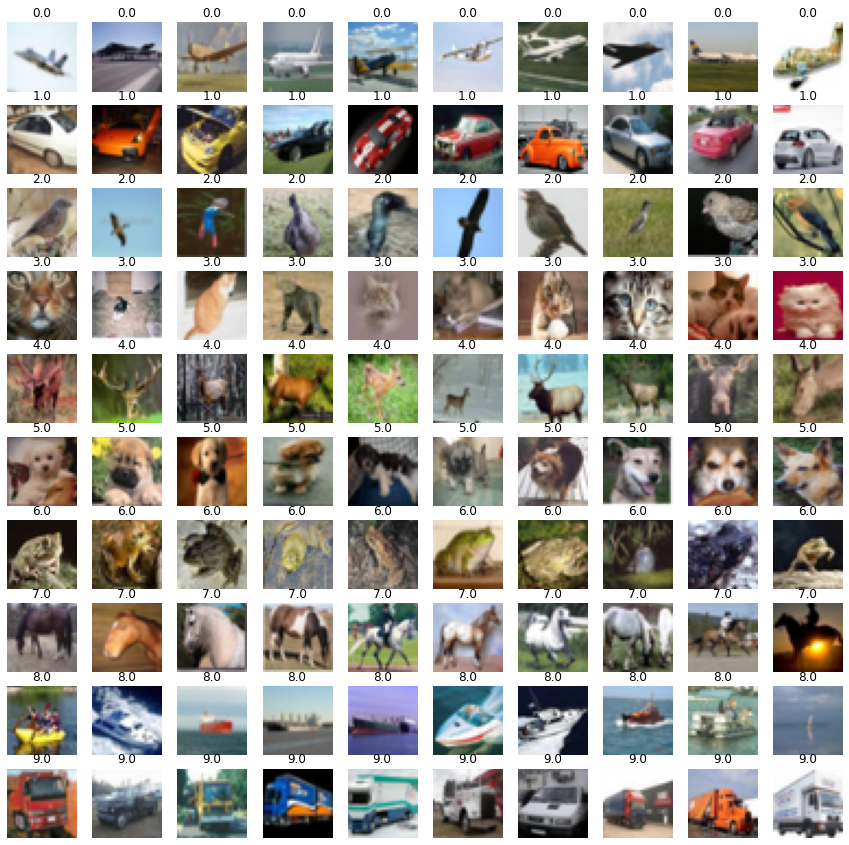

In [63]:
fig = plt.figure(figsize=(15, 15))
img = np.zeros((1024, 3), dtype=np.uint8)
for i in range(100):
    plt.subplot(10, 10, i+1)
    img[:,0] = X[i, :1024]
    img[:,1] = X[i, 1024:2048]
    img[:,2] = X[i, 2048:]

    plt.imshow(img.reshape(32, 32, 3))
    plt.axis('off')
    plt.title(y[i])


# plt.imshow(img.astype(np.uint8).reshape(32, 32, -1))

In [64]:
%%time
clf = UKMeans(epsilon=1e-10)
clf.fit(X)

CPU times: user 219 ms, sys: 8 µs, total: 219 ms
Wall time: 218 ms


In [65]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 5, number of clusters: 8, AR: 0
